# Author: Alejandro C. Parra Garcia

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
path="D:\\Personal\\Alex\\Uni\\MS IA\\1 Curso\\FALL\\Auto.Mach.Learn\\Practical Challenges\\M8\\M8 A.3 Shadowing Exercise Time-Series Modeling (Python)\\DataSet\\sunspots2.csv"

In [3]:
df = pd.read_csv(path,sep=";", parse_dates=['Month'])
df['Sunspots'] = df['Sunspots'].str.replace(',','.')
df['Sunspots'] = df['Sunspots'].astype(float)
df

,Sunspots,Month
0,9.4,1900-01-01
1,13.6,1900-02-01
2,8.6,1900-03-01
3,16.0,1900-04-01
4,15.2,1900-05-01
...,...,...
1003,71.8,1983-08-01
1004,50.3,1983-09-01
1005,55.8,1983-10-01
1006,33.3,1983-11-01


In [4]:
df.dtypes

Sunspots           float64
Month       datetime64[ns]
dtype: object

In [5]:
df.isnull().sum()

Sunspots    0
Month       0
dtype: int64

# Plot Data

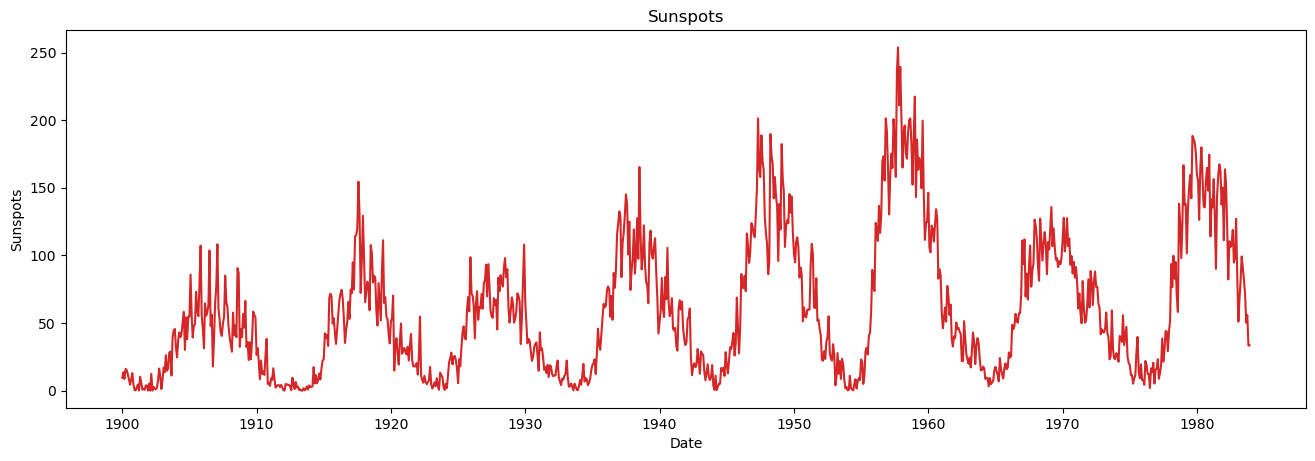

In [6]:

plt.figure(figsize=(16,5), dpi=100)

plt.plot(df.Month, df.Sunspots, color='tab:red')

plt.title('Sunspots')
plt.ylabel('Sunspots')
plt.xlabel('Date')
plt.show()

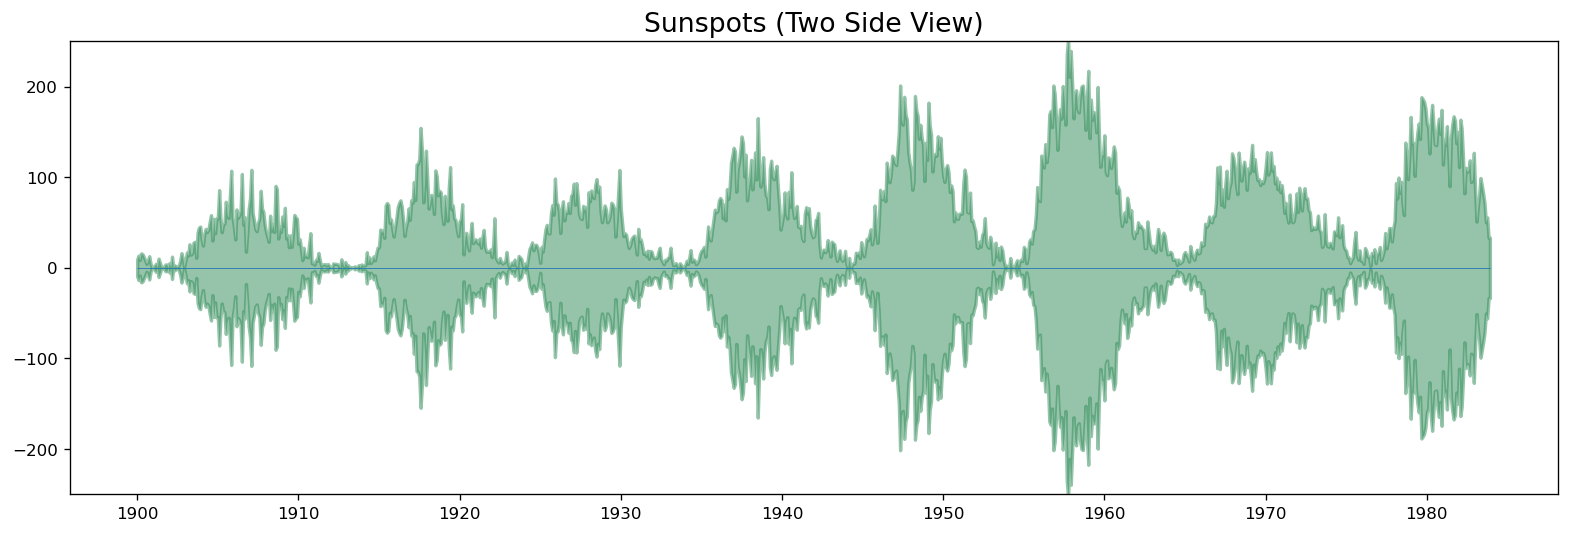

In [7]:
# Code from https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Import data
x = df['Month'].values
y1 = df['Sunspots'].values
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-250, 250)
plt.title('Sunspots (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth=.5)
plt.show()

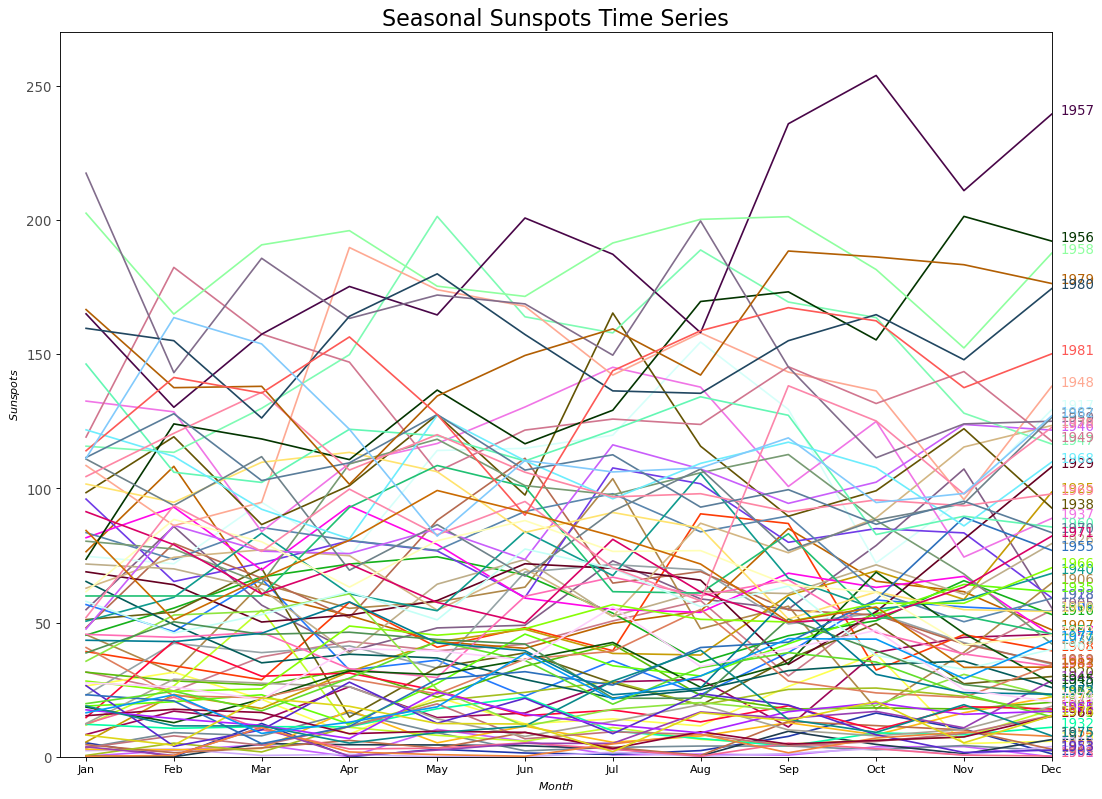

In [8]:
# Code from https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Prepare data
df['year'] = [d.year for d in df.Month]
df['month'] = [d.strftime('%b') for d in df.Month]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Sunspots', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'Sunspots'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(0, 270), ylabel='$Sunspots$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Sunspots Time Series", fontsize=20)
plt.show()

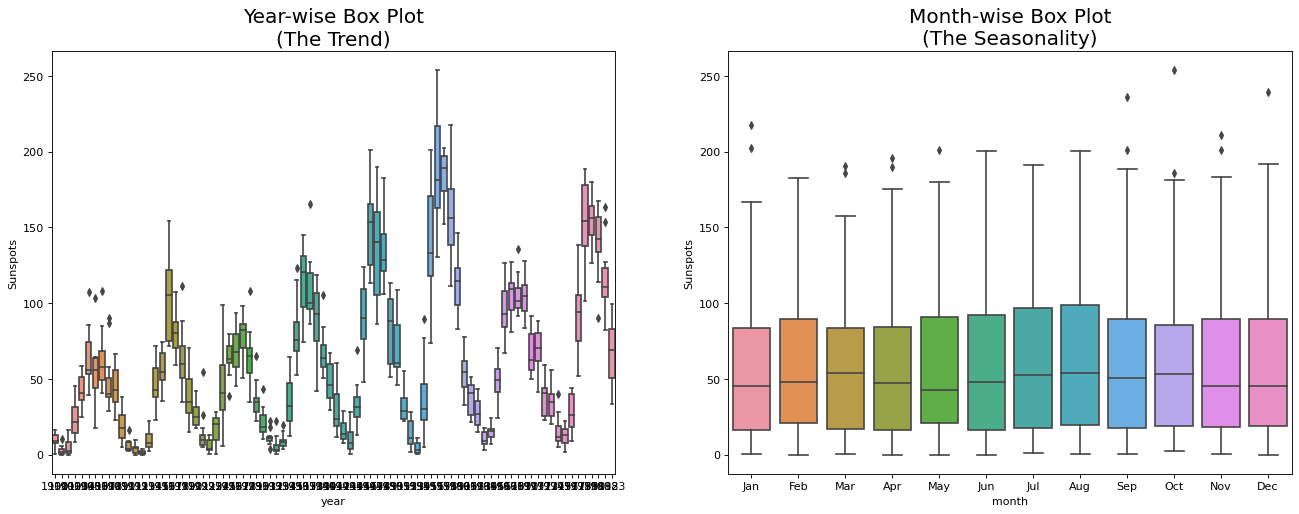

In [9]:
# Code from https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Prepare data
df['year'] = [d.year for d in df.Month]
df['month'] = [d.strftime('%b') for d in df.Month]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sunspots', data=df, ax=axes[0])
sns.boxplot(x='month', y='Sunspots', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

We can see that there is a pattern that repeats itself more or less every 10 years.

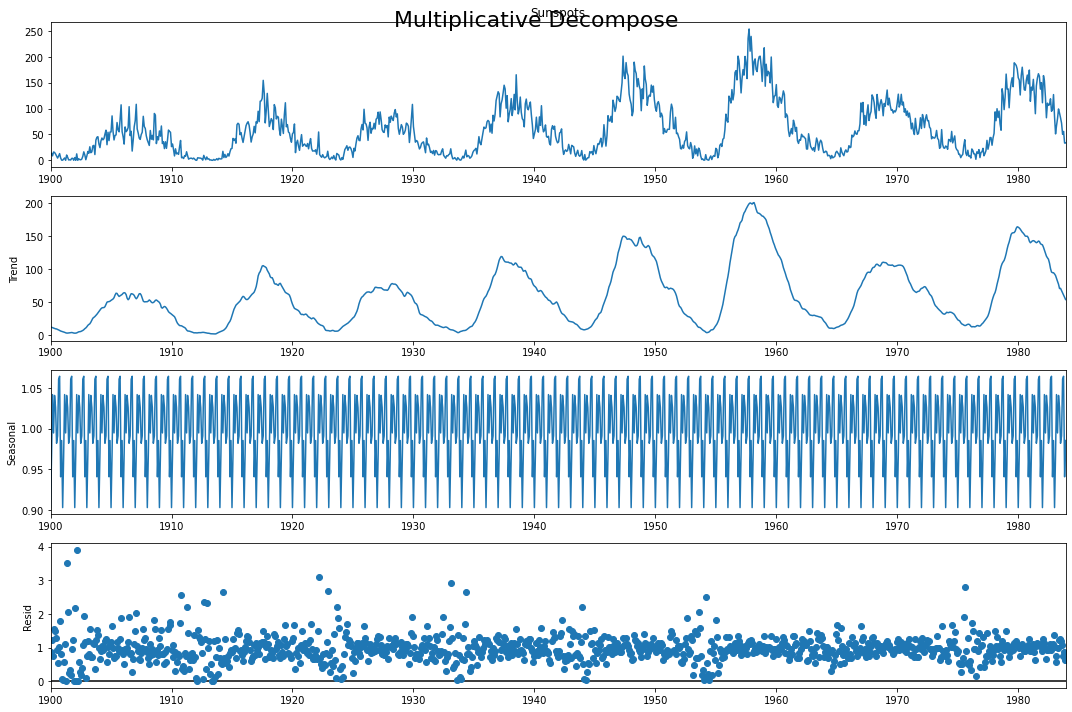

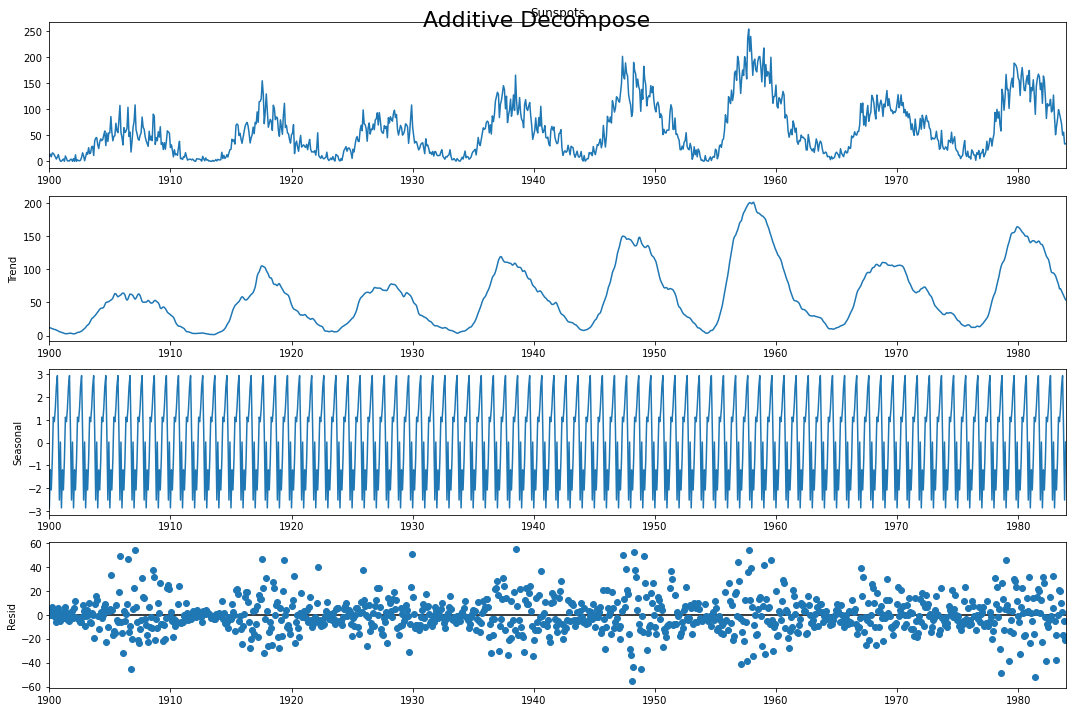

In [10]:
# Import Data
df = pd.read_csv(path,sep=";", parse_dates=['Month'], index_col='Month')
df['Sunspots'] = df['Sunspots'].str.replace(',','.')
df['Sunspots'] = df['Sunspots'].astype(float)
#df = df[df['Sunspots'] > 0].reset_index(drop=True)
df.loc[df['Sunspots'] <= 0, 'Sunspots'] = 0.01


# Code from https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Sunspots'], model='multiplicative', extrapolate_trend='freq')
# Additive Decomposition
result_add = seasonal_decompose(df['Sunspots'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (15,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Make a time series stationary

In [11]:
# Code from https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# ADF Test
result = adfuller(df.Sunspots.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.Sunspots.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.657949106048484
p-value: 9.524782262195668e-07
Critial Values:
   1%, -3.4369860032923145
Critial Values:
   5%, -2.8644697838498376
Critial Values:
   10%, -2.5683299626694422

KPSS Statistic: 0.906854
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


# Detrend

Text(0.5, 1.0, 'Sunspots detrended by subtracting the trend component')

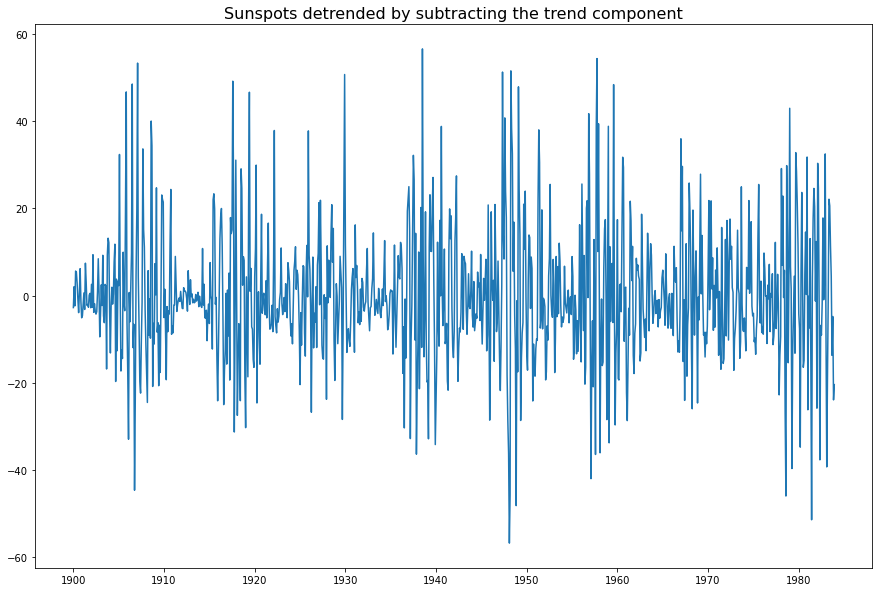

In [12]:
# Code from https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(df['Sunspots'], model='multiplicative', extrapolate_trend='freq')
detrended = df.Sunspots.values - result_mul.trend

df['Sunspots_detrended']=detrended

plt.plot(detrended)
plt.title('Sunspots detrended by subtracting the trend component', fontsize=16)

[]

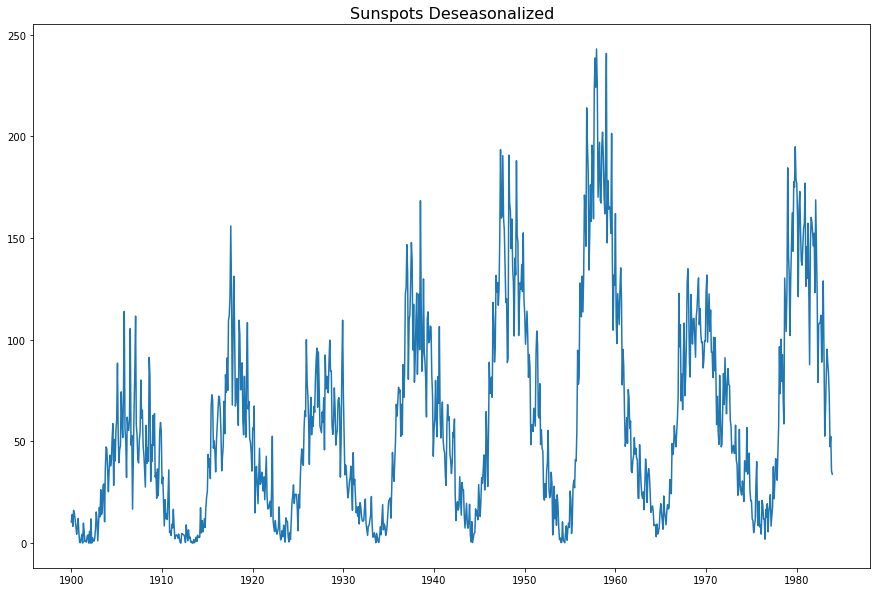

In [13]:
# Subtracting the Trend Component.
# Time Series Decomposition
result_mul = seasonal_decompose(df['Sunspots'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.Sunspots.values / result_mul.seasonal
df['Sunspots_deseasonalized']=deseasonalized

# Plot
plt.plot(deseasonalized)
plt.title('Sunspots Deseasonalized', fontsize=16)
plt.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

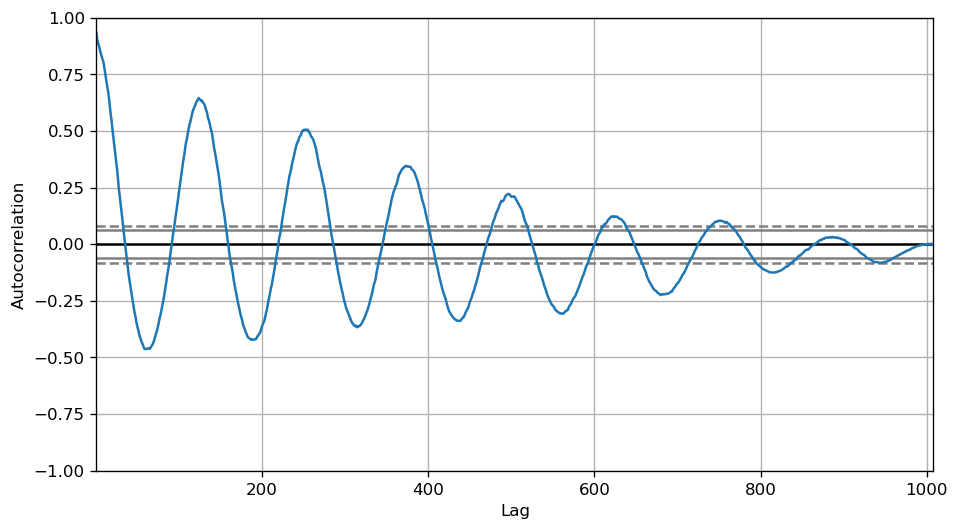

In [14]:
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.Sunspots.tolist())

# ARIMA

In [15]:
from statsmodels.tsa.arima.model import ARIMA


In [16]:
df_arima=df["Sunspots"]

                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                 1008
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4275.002
Date:                Sun, 07 Nov 2021   AIC                           8562.004
Time:                        16:07:24   BIC                           8591.493
Sample:                    01-01-1900   HQIC                          8573.208
                         - 12-01-1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3472      0.027    -12.670      0.000      -0.401      -0.294
ar.L2         -0.2700      0.029     -9.219      0.000      -0.327      -0.213
ar.L3         -0.1648      0.028     -5.883      0.0

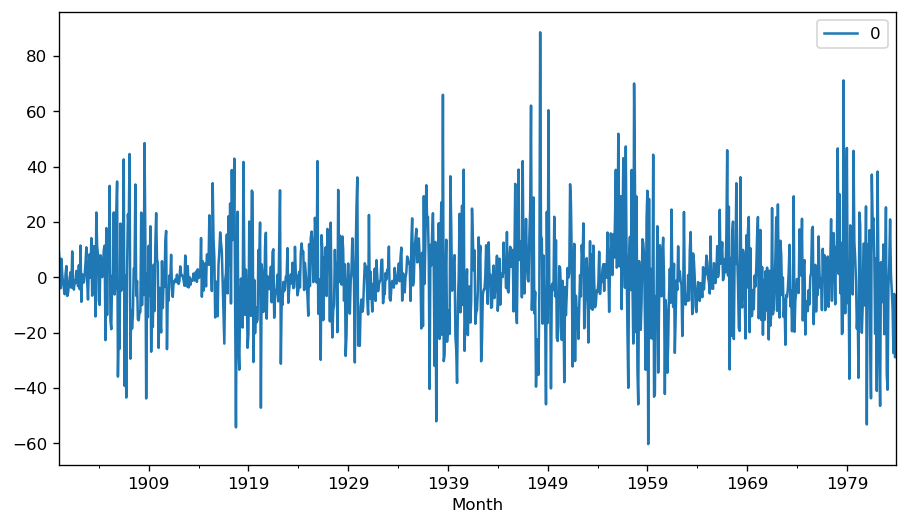

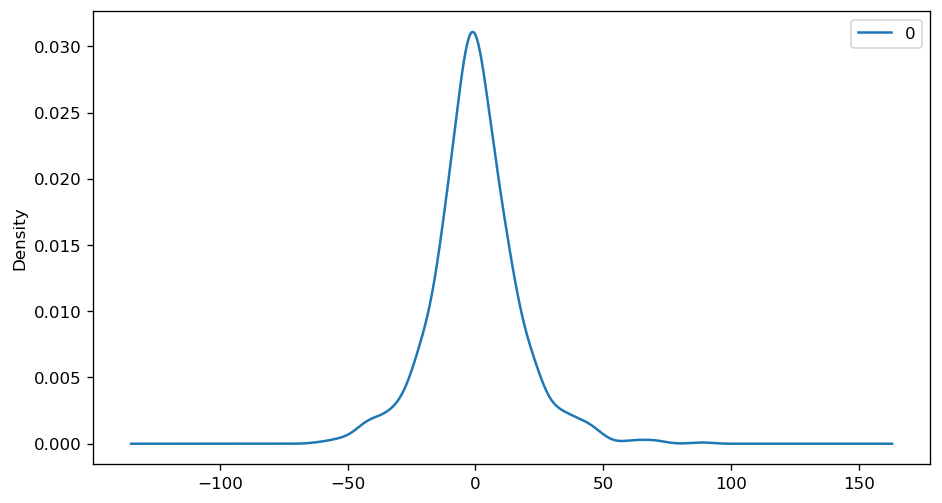

                 0
count  1008.000000
mean      0.065942
std      16.884313
min     -60.235618
25%      -8.793378
50%      -0.741697
75%       8.258678
max      88.592728


In [17]:

model = ARIMA(df_arima, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [18]:

# split into train and test sets
X = df_arima.values
#size = int(len(X) * 0.7)
size=876
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

Test RMSE: 19.530


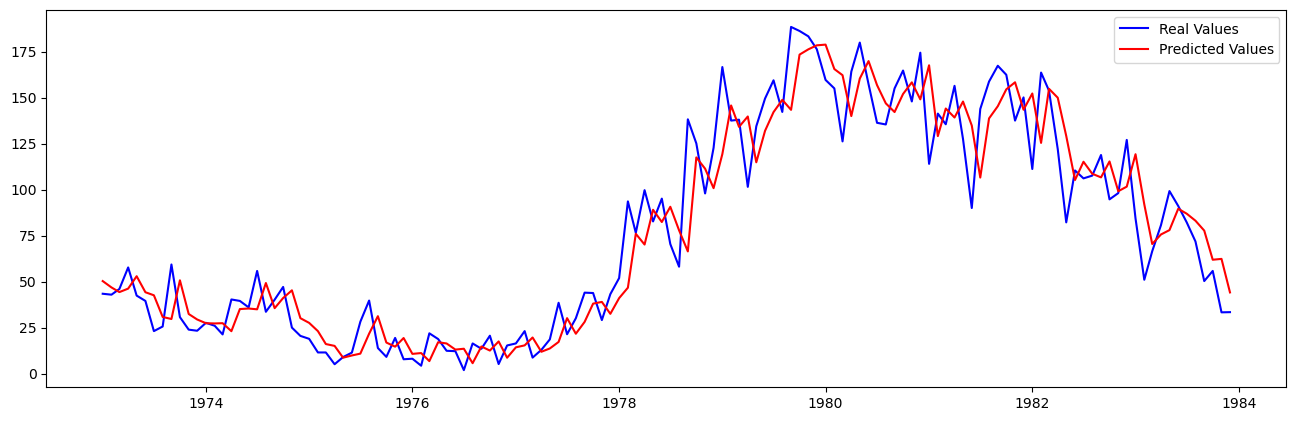

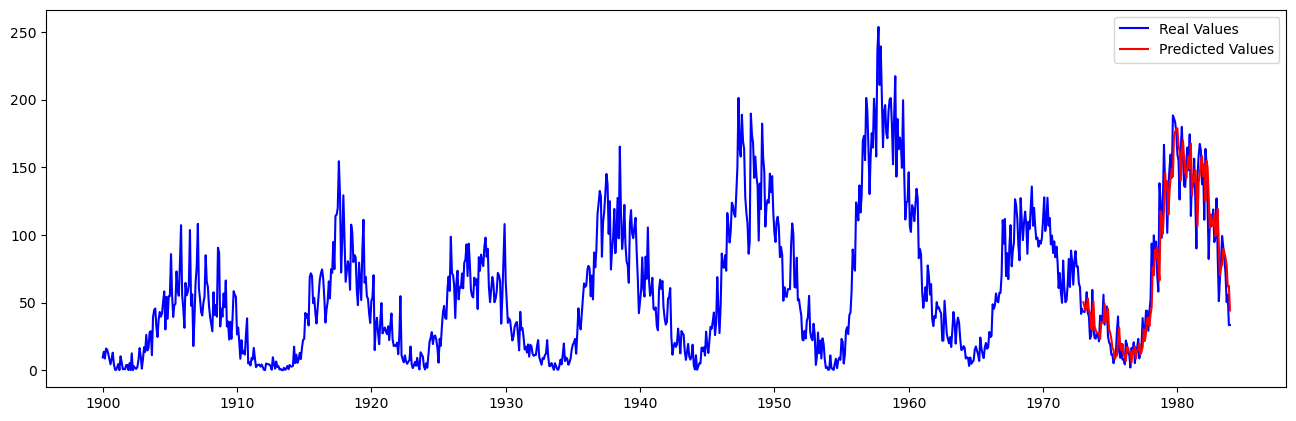

In [19]:
# evaluate forecasts
size=876
train_p, test_p = df_arima[0:size], df_arima[size:len(X)]
df_copy=df[size:len(X)].copy()
df_copy["Predictions"]=predictions

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(16,5), dpi=100)
plt.plot(test_p, c='b', label="Real Values")
plt.plot(df_copy["Predictions"], color='red',label="Predicted Values")
plt.legend()
plt.show()


# plot forecasts against actual outcomes
plt.figure(figsize=(16,5), dpi=100)
plt.plot(train_p, c='b', label="Real Values")
plt.plot(test_p, c='b')
plt.plot(df_copy["Predictions"], color='red',label="Predicted Values")
plt.legend()
plt.show()

In [22]:
test_p

Month
1973-01-01    43.4
1973-02-01    42.9
1973-03-01    46.0
1973-04-01    57.7
1973-05-01    42.4
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Name: Sunspots, Length: 132, dtype: float64

In [33]:
size=876
train, test = X[0:size], X[size:len(X)]
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit()

pred=model_fit.predict(start=size, end=len(X)-1)
#model_fit.predict(start='1973-01-01', end='1983-12-01')

Test RMSE: 19.411


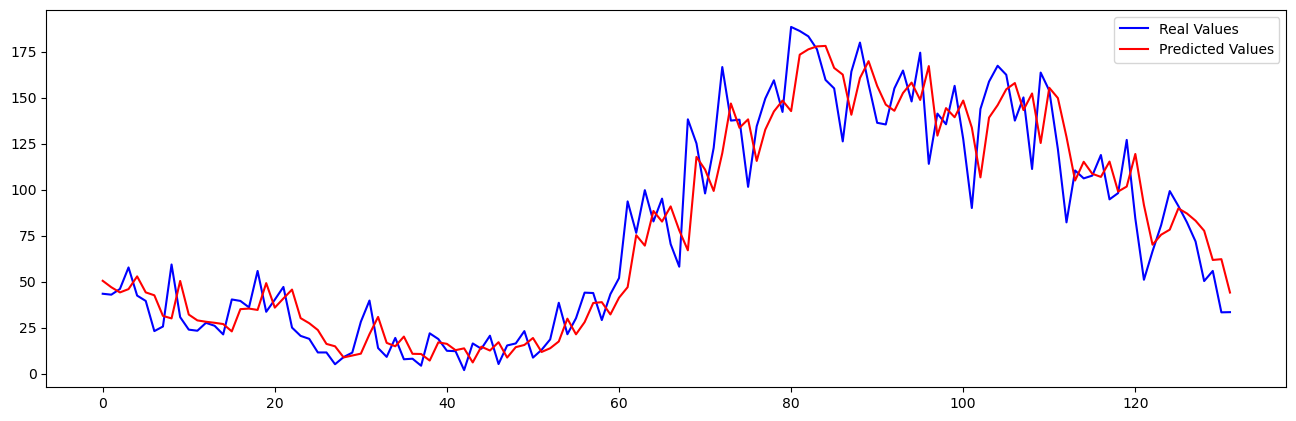

In [34]:
rmse = sqrt(mean_squared_error(test, pred))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(16,5), dpi=100)
plt.plot(test, c='b', label="Real Values")
plt.plot(pred, color='red',label="Predicted Values")
plt.legend()
plt.show()